# Follow Me - Write Up

### INDEX

- ####  Data Analisys
        dron camera diagrams
         Encoding and decoding files
         nice presentation
           
- ####  Data Gathering
        train data + extra data
           total data and some stats
- ####  Network Analysis
        network diagram + analisys --> tensors shapes 
- ####  HyperParameters
        selection bases on paper -- reference (fully conv nets for semantic segmentation learning_rate = 10-3)
        
- ####  Training and Results
        the results after AWS
- ####  Further developments
        Depth decoder from raw image --> depth camera vs computing depth?
        New objects detection type --> trees, roads, buildings --> How do we obtain the masked images?
        



In [39]:
#LOAD MODULES
import glob
from tqdm import tqdm_notebook as tqdm
from random import randint
import matplotlib
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

The dron has 4 cameras with different views/ranges:
    1. World 
    2. People
    3. Camera
    4. Depth

The files are labeled as follow for one of the four cameras  "cam( number )_( 5 digits number )"

With a simple script we can extract and visualize the different camera views

In [40]:
#Load all images from selected folder in a sorted list with the 4 camera views

folder = 'data/raw_sim_data/train/IMG/'

def img_to_list(folder):
    img_list = glob.glob(folder +'*.png')
    return img_list

images =sorted(img_to_list(folder))

steps = int(len(images)/4)
dron_images_list = []
for i in range(0,steps):
    cameras_pick = []
    for j in range(0,4):
        cameras_pick.append(images[i+j*steps])
    dron_images_list.append(cameras_pick)


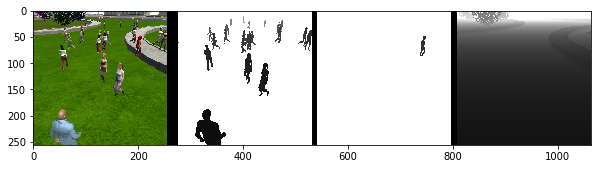

In [155]:
# Select a random number and load the pictures for visualization
it = randint(0,steps)

ran_images = [np.array(mpimg.imread(img)) for img in dron_images_list[it]]
#generate a border for between images
border = np.zeros((ran_images[0].shape[0],10,3))
img_concat = np.concatenate((ran_images[0],border),axis=1)
for i in ran_images[1:]:
    img_concat = np.concatenate((img_concat,border,i),axis=1)
    
plt.figure(figsize=(10,5))
plt.imshow(img_concat)
plt.show()


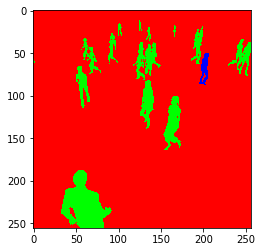

In [156]:
#We this information we can create the mask for training our algorithms
# As is developed in this project we need to generate a RGB image with:
#   BLUE channel = pixel from the image one
#
#
def mask_img(imag):
    imag = imag.copy()
    imag[imag==1] = 0
    imag[imag!=0] = 1
    return imag
# a new imag with all zeros from the shape of the original images
img = np.zeros(ran_images[1].shape)
people = mask_img(ran_images[1].copy())
hero = mask_img(ran_images[2].copy())
no_world = people + hero
mask = (no_world[:,:,0] == 0)

img[:,:,0][mask] = 1
img[:,:,1] = people[:,:,0]
img[:,:,2] = hero[:,:,0]

plt.imshow(img)
plt.show()